In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [6]:
df=pd.read_csv('Desktop/bill_authentication.csv')

In [7]:
df.head(10)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [8]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [10]:
df.head(3)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


The split is
 0    0.555394
1    0.444606
Name: Class, dtype: float64


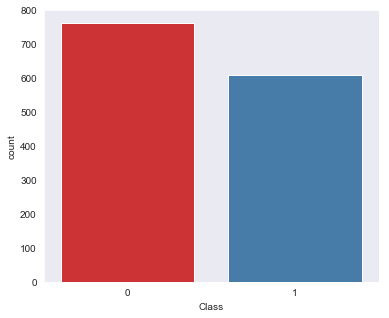

In [19]:
sns.set_style('dark')
plt.figure(figsize=(6,5))
sns.countplot(df['Class'],data=df,palette='Set1')
print('The split is' '\n', df['Class'].value_counts(normalize=True))

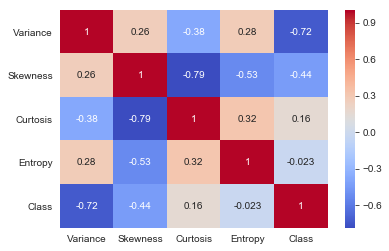

In [21]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Text(0.5,1,'Entropy Split')

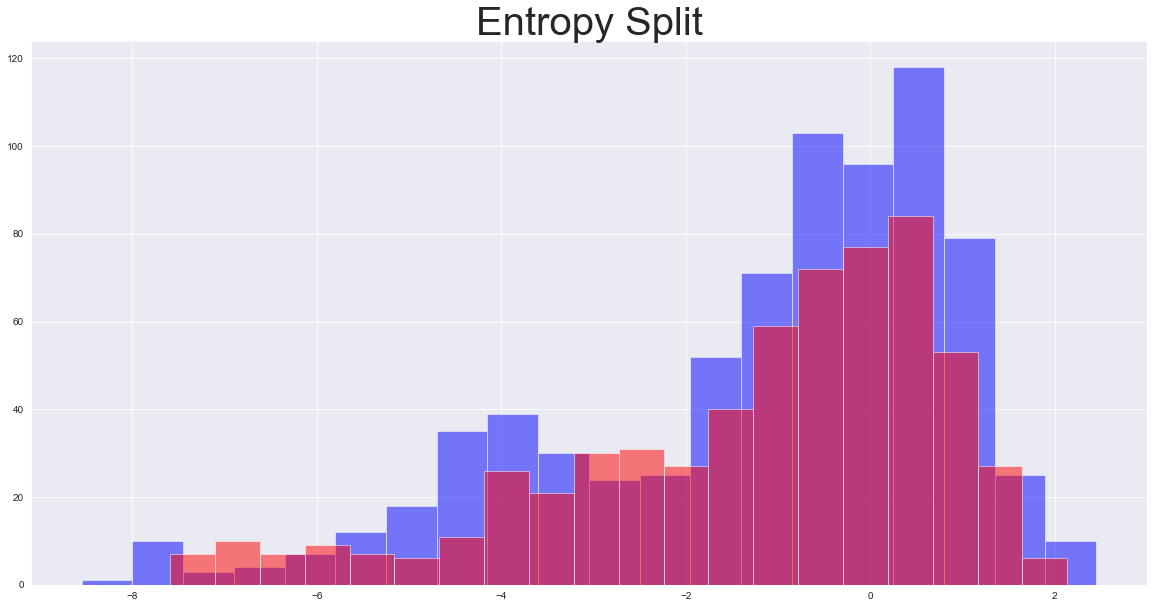

In [29]:
plt.figure(figsize=(20,10))
df[df['Class']==0]['Entropy'].hist(bins=20,color='blue',alpha=0.5)
df[df['Class']==1]['Entropy'].hist(bins=20,color='red',alpha=0.5)
plt.title('Entropy Split',fontsize=40)

Text(0.5,1,'Curtosis Split')

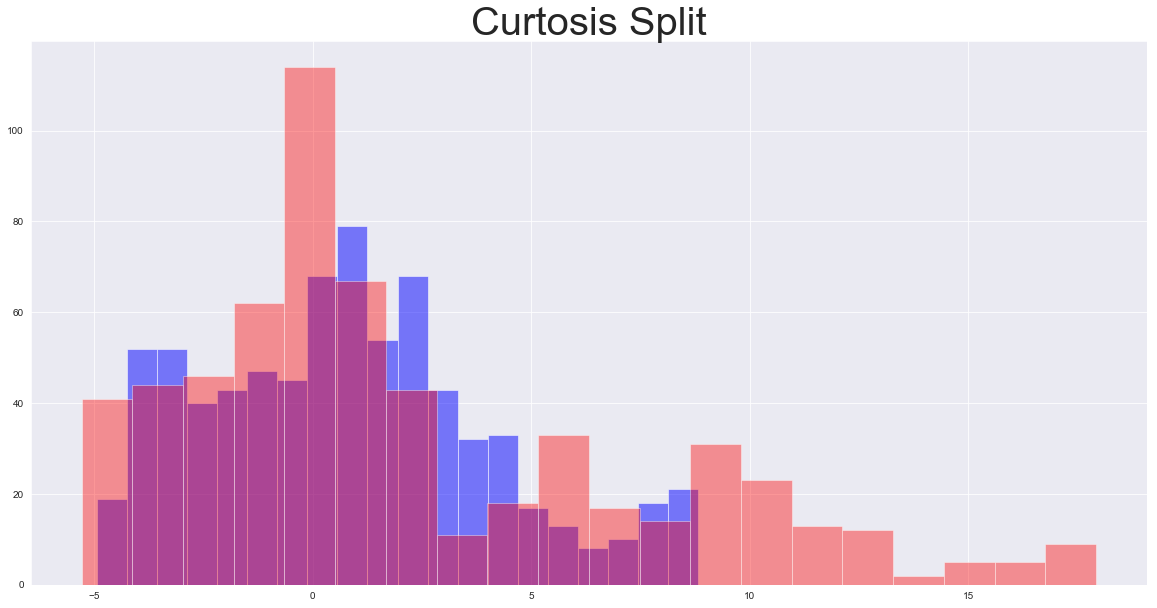

In [32]:
plt.figure(figsize=(20,10))
df[df['Class']==0]['Curtosis'].hist(bins=20,color='blue',alpha=0.5)
df[df['Class']==1]['Curtosis'].hist(bins=20,color='red',alpha=0.4)
plt.title('Curtosis Split',fontsize=40)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer

In [37]:
df.keys()

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [39]:
X=df.drop('Class',axis=1)
y=df['Class']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
preproc=make_pipeline(StandardScaler(),Normalizer())

In [42]:
preproc.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('normalizer', Normalizer(copy=True, norm='l2'))])

In [43]:
preproc.transform(X_test)
preproc.transform(X_train)

array([[-0.86161305,  0.36659713, -0.07844845, -0.34216274],
       [ 0.81565839,  0.07605278, -0.01114817,  0.57340481],
       [-0.26954854,  0.48385653, -0.04269067, -0.83150704],
       ...,
       [-0.54627517, -0.47902609,  0.19771534,  0.65804718],
       [ 0.30947214,  0.69086397, -0.62880423, -0.17759283],
       [ 0.77410269, -0.14139327,  0.05033092,  0.61501201]])

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg=LogisticRegression()

In [47]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
pred=logreg.predict(X_test)

In [51]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))

Classification Report:

              precision    recall  f1-score   support

          0       0.99      0.99      0.99       156
          1       0.98      0.99      0.99       119

avg / total       0.99      0.99      0.99       275



In [55]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [56]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
pred=tree.predict(X_test)

In [58]:
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))

Classification Report:

              precision    recall  f1-score   support

          0       0.99      0.99      0.99       156
          1       0.99      0.98      0.99       119

avg / total       0.99      0.99      0.99       275



In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)

In [61]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
pred=rfc.predict(X_test)

In [63]:
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))

Classification Report:

              precision    recall  f1-score   support

          0       1.00      0.99      1.00       156
          1       0.99      1.00      1.00       119

avg / total       1.00      1.00      1.00       275



In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
pred=knn.predict(X_test)

In [68]:
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))

Classification Report:

              precision    recall  f1-score   support

          0       1.00      1.00      1.00       156
          1       1.00      1.00      1.00       119

avg / total       1.00      1.00      1.00       275



In [69]:
from sklearn.svm import SVC

In [74]:
svm=SVC(kernel='linear')

In [75]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
pred=svm.predict(X_test)

In [77]:
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))

Classification Report:

              precision    recall  f1-score   support

          0       0.99      0.99      0.99       156
          1       0.98      0.99      0.99       119

avg / total       0.99      0.99      0.99       275

